In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="dark")
sns.set_palette("RdBu_r")
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [21]:
df = pd.read_csv('heart.csv')

## data sourced from www.kaggle.com/fedesoriano/heart-failure-prediction

Possible themes to be explored:
How much of an indicator is RestingECG for Heart Desiease?
How many people are having premature heart conditions?


In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df.shape

(918, 12)

In [24]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

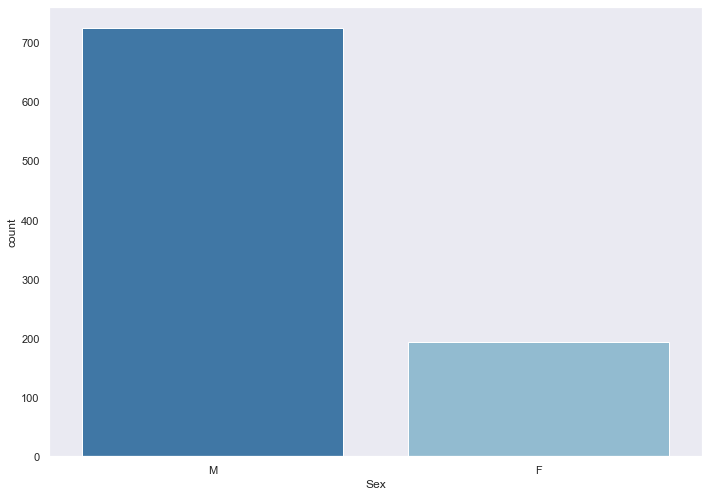

In [27]:
sns.countplot(x=df['Sex'] );

In [28]:
df_num = df.select_dtypes(include='int64')
df_cat = df.select_dtypes(include='object')

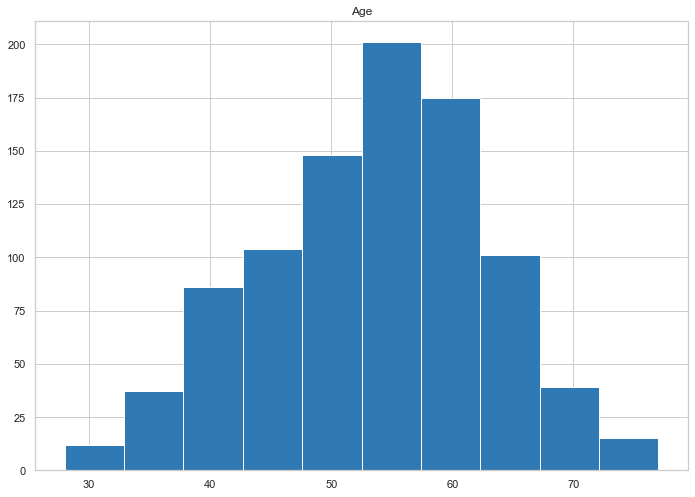

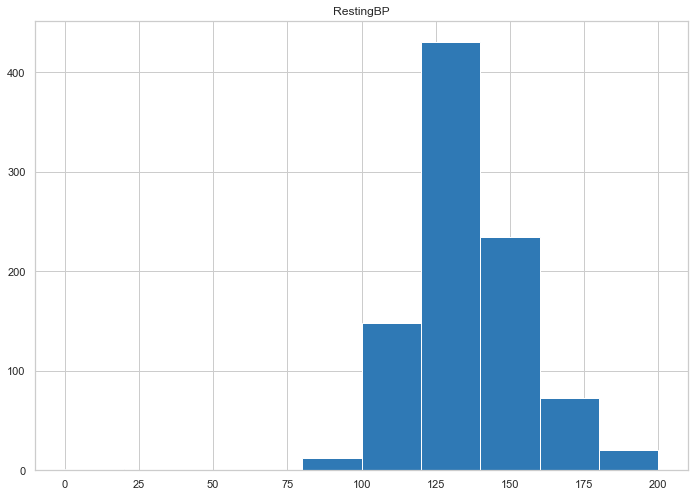

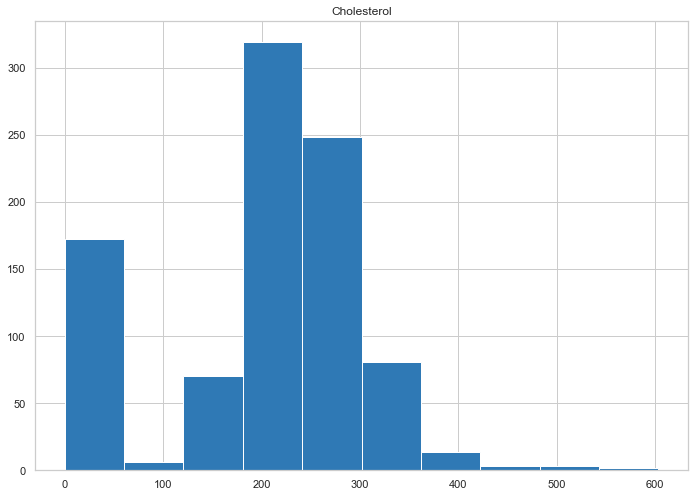

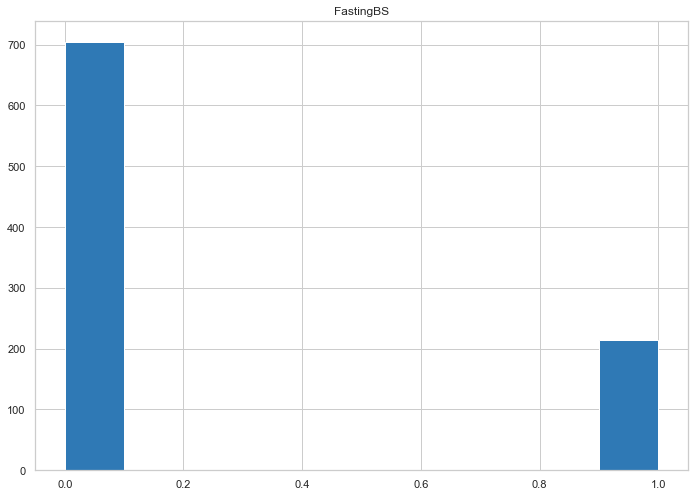

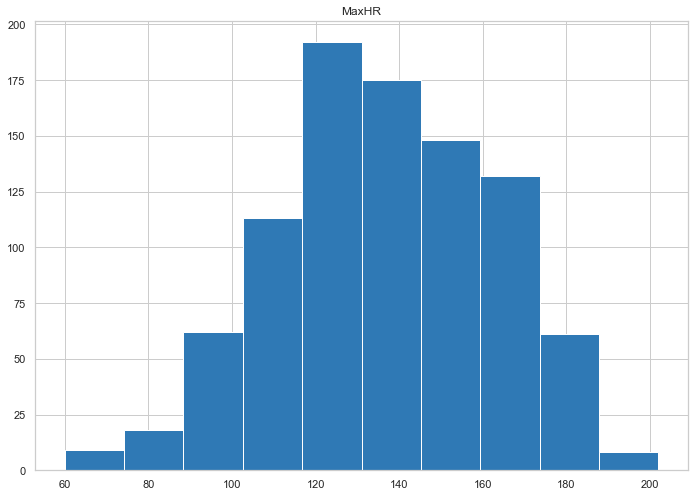

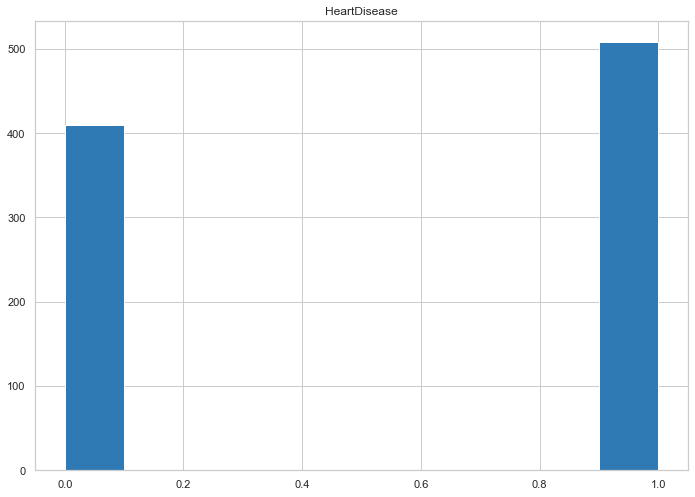

In [29]:
sns.set_style("whitegrid")
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [30]:
premature = df[(df['Age']<55) & (df['HeartDisease']==1) & (df['Sex']=='M') |
               (df['Age']<65) & (df['HeartDisease']==1) & (df['Sex']=='F')]
premature

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:>

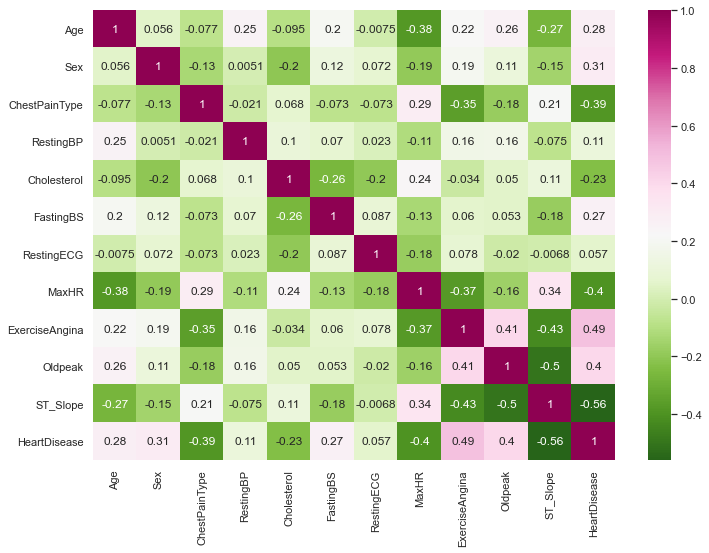

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='PiYG_r')

## Modelos Preditivos

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

### Separando variáveis previsoras e classe

In [35]:
x_heart = df.iloc[:,0:11]
y_heart = df.iloc[:,11]

x_heart.shape, y_heart.shape

((918, 11), (918,))

### Decision Tree

In [36]:
parametros = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2,5,10,20],
             'min_samples_leaf': [1, 5, 10, 20]}

In [37]:
gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parametros)
gridsearch.fit(x_heart, y_heart)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']})

In [38]:
melhores_parametros = gridsearch.best_params_
melhor_resultado = gridsearch.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
0.8419577096697554


### Random Forest

In [39]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 20, 40, 100, 150],
              'min_samples_split': [2,5,10,20],
              'min_samples_leaf': [1, 5, 10, 20]}

In [40]:
gridsearch = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
gridsearch.fit(x_heart, y_heart)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 20, 40, 100, 150]})

In [41]:
melhores_parametros = gridsearch.best_params_
melhor_resultado = gridsearch.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 40}
0.8441197434069849


### K Nearest Neghibors

In [42]:
parametros = {'n_neighbors': [3,5,10,20],
             'p':[1,2],
             'metric': ['euclidean','manhattan','chebyshev','minkowski']}
gridsearch = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parametros)
gridsearch.fit(x_heart, y_heart)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]})

In [43]:
melhores_parametros = gridsearch.best_params_
melhor_resultado = gridsearch.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'metric': 'manhattan', 'n_neighbors': 20, 'p': 1}
0.7330898075552387


### Support vector

In [44]:
parametros = {'tol':[0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
             'kernel':['rbf', 'sigmoid', 'linear', 'poly']}
gridsearch = GridSearchCV(estimator= SVC(), param_grid = parametros)
gridsearch.fit(x_heart, y_heart)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [45]:
melhores_parametros = gridsearch.best_params_
melhor_resultado = gridsearch.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'linear', 'tol': 0.0001}
0.8180446661914944


### Neural Network


In [46]:
parametros = {'activation':['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
             'batch_size': [10, 58]}
gridsearch = GridSearchCV(estimator= MLPClassifier(max_iter=400), param_grid = parametros)
gridsearch.fit(x_heart, y_heart)

GridSearchCV(estimator=MLPClassifier(max_iter=400),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'batch_size': [10, 58], 'solver': ['adam', 'sgd']})

In [47]:
melhores_parametros = gridsearch.best_params_
melhor_resultado = gridsearch.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'logistic', 'batch_size': 10, 'solver': 'adam'}
0.8158232359230221


In [48]:
from sklearn.model_selection import cross_val_score, KFold

In [49]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_svm = []
resultados_neural_network = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, min_samples_split= 2, splitter= 'random')
    score = cross_val_score(arvore, x_heart, y_heart, cv = kfold)
    resultados_arvore.append(score.mean())
    
    randomforest = RandomForestClassifier(criterion='entropy', min_samples_leaf=20, min_samples_split=2, n_estimators= 20)
    score = cross_val_score(randomforest, x_heart, y_heart, cv = kfold)
    resultados_random_forest.append(score.mean())
    
    knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 20, p= 1)
    score = cross_val_score(knn, x_heart, y_heart, cv = kfold)
    resultados_knn.append(score.mean())
    
    svm = SVC(C= 1.5, kernel= 'linear', tol= 0.0001)
    score = cross_val_score(svm,x_heart, y_heart, cv = kfold)
    resultados_svm.append(score.mean())
    
    neural = MLPClassifier(activation= 'relu', batch_size= 58, solver= 'adam')
    score = cross_val_score(neural,x_heart, y_heart, cv = kfold)
    resultados_neural_network.append(score.mean())

In [50]:
resultados = pd.DataFrame({'Arvore': resultados_arvore,
                          'Random Forest': resultados_random_forest,
                          'KNN': resultados_knn,
                          'SVM': resultados_svm,
                          'Rede Neural': resultados_neural_network})
resultados

,Arvore,Random Forest,KNN,SVM,Rede Neural
0,0.839907,0.864895,0.742869,0.859448,0.823483
1,0.843072,0.863808,0.737482,0.858349,0.828942
2,0.832286,0.858397,0.736419,0.854049,0.832286
3,0.832191,0.854037,0.748304,0.862769,0.818060
4,0.835463,0.856187,0.741746,0.855088,0.836527
5,0.848555,0.863784,0.737375,0.857274,0.821261
6,0.836550,0.854013,0.738557,0.855053,0.813677
7,0.835535,0.863808,0.738521,0.859388,0.834341
8,0.836622,0.862745,0.743000,0.857346,0.808421
9,0.840934,0.861694,0.742845,0.860583,0.846452


In [51]:
resultados.describe()

,Arvore,Random Forest,KNN,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.838711,0.859111,0.740251,0.856897,0.823459
std,0.006274,0.005251,0.005434,0.002949,0.014791
min,0.827903,0.847432,0.731940,0.850776,0.776756
25%,0.832322,0.856193,0.736658,0.855100,0.818087
50%,0.838282,0.859992,0.740182,0.857274,0.827377
75%,0.843144,0.863524,0.742869,0.859129,0.832295
max,0.851839,0.868275,0.751672,0.862769,0.846452


In [52]:
resultados.var()

Arvore           0.000039
Random Forest    0.000028
KNN              0.000030
SVM              0.000009
Rede Neural      0.000219
dtype: float64

In [56]:
(resultados.std()* resultados.mean()) *100

Arvore           0.526232
Random Forest    0.451111
KNN              0.402236
SVM              0.252734
Rede Neural      1.218009
dtype: float64